# Table of Contents
* [1. Solving The ODE](#1.-Solving-The-ODE)
* [2. Lissajous Figures for ODEs](#2.-Lissajous-Figures-for-ODEs)
	* [2.1 Exploring Omega Ratios](#2.1-Exploring-Omega-Ratios)
	* [2.2 Exploring Initial Starting Points](#2.2-Exploring-Initial-Starting-Points)
	* [2.3 Exploring Initial Velocities](#2.3-Exploring-Initial-Velocities)
        


# 1. Solving The ODE

Before we are able to get into Lissajous figures for a harmonic oscillator  in two dimesnions , first we must talk about ODEs. This is the case because in order to get our Lissajous figures we must solve an ODE and get position as a function of time to plot the path. To solve our ODE we use a net force of: 
$$\vec{F}_{net}=\langle -m\omega_1^2x, -m\omega_2^2y, 0 \rangle$$

After our Net force is obtained, we use Newtons second law to determine how our position and velocity will change each time step into the motion of the oscillator. 

Newton's second law for constant mass is:

$$\frac{dv}{dt}=\frac{\vec{F}_{net}}{m}$$

$$\frac{dx}{dt}=v_x$$

$$\frac{dy}{dt}=v_y$$

Using this we are able to make a function that creates an array that that will return the values after each time step. 

In [3]:
import numpy as np #Imported Packages needed
import matplotlib.pyplot as plt
import ode

In [4]:
#Sets Values for inital use
rx0=0
ry0=0
vx0=2
vy0=2
m = 1
t = 0.0
h = 0.02 #time step
tf=10  #Final Time 
w1=4 #omega 1
w2=1 #omega 2





def spring(y0,t): #Solves for Dydt which holds values for rx,ry,vx,vy
    dydt = np.zeros(4) #initialize array; each element is a derivative of y [x,y, vx, vy]
    dydt[0] = y0[2] 
    dydt[1] = y0[3] 
    dydt[2] = -(w1**2)*y0[0]
    dydt[3] = -(w2**2)*y0[1]
    return dydt



After This has been accomplished, Three functions can be used that all use a different method for solving our ODE. We will be using the Eulers method, RK2 method, and the RK4 method to see which produces a better model for the path of the Oscillator.  

In [5]:
def RK4L(rx0,ry0,vx0,vy0,tf):
    t = 0.0 #Reset inital Conditions
    y0=[rx0,ry0,vx0,vy0]
    ta, yn, xn = [],[],[]

    while t<tf:
        ta.append(t)
        yn.append(y0[1])
        xn.append(y0[0])

        s1=ode.RK4(spring,y0,t,h)

        for i in range(len(s1)): #reset y0 to the new vector
            y0[i] = s1[i]


        t = t + h

    plt.figure()
    plt.plot(xn,yn, 'y-', label='Trajectory')
    plt.title('RK4')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.show()
    
    return
#####################################################################################
def RK2L(rx0,ry0,vx0,vy0,tf):
    t = 0.0 #Reset inital Conditions
    y0=[rx0,ry0,vx0,vy0]
    ta, yn, xn = [],[],[]

    while t<tf:
        ta.append(t)
        yn.append(y0[1])
        xn.append(y0[0])

        s1=ode.RK2(spring,y0,t,h)

        for i in range(len(s1)): #reset y0 to the new vector
            y0[i] = s1[i]


        t = t + h

    plt.figure()
    plt.plot(xn,yn, 'y-', label='Trajectory')
    plt.title('RK2')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.show()
    
    return
#####################################################################################
def EulerL(rx0,ry0,vx0,vy0,tf):
    t = 0.0 #Reset inital Conditions
    y0=[rx0,ry0,vx0,vy0]
    ta, yn, xn = [],[],[]

    while t<tf:
        ta.append(t)
        yn.append(y0[1])
        xn.append(y0[0])

        s1=ode.Euler(spring,y0,t,h)

        for i in range(len(s1)): #reset y0 to the new vector
            y0[i] = s1[i]


        t = t + h

    plt.figure()
    plt.plot(xn,yn, 'y-', label='Trajectory')
    plt.title('Eulers Method')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.show()
    
    return

Plots are then created to show the motion of each ODE solver.

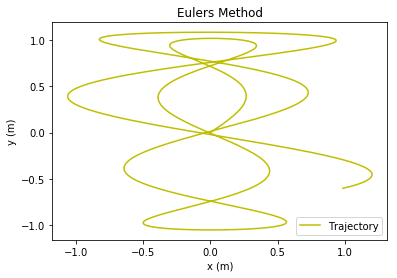

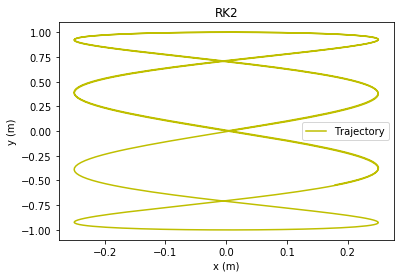

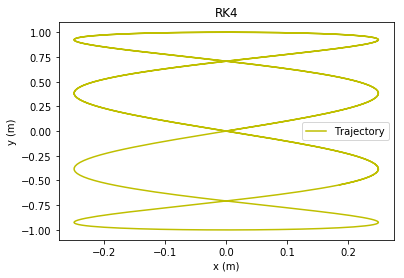

In [6]:
EulerL(0,0,1,1,10) #They all use the same initial values and run for the same amount of time 
RK2L(0,0,1,1,10)
RK4L(0,0,1,1,10)



It can be seen from the plots, that the Euler Method is the most inacurate method for solving our ODE and the RK2 method as well as the RK4 method do a pretty good job plotting the path. Which one is better though, to figure this out we will let the loop run for longer and see how each plot is affected

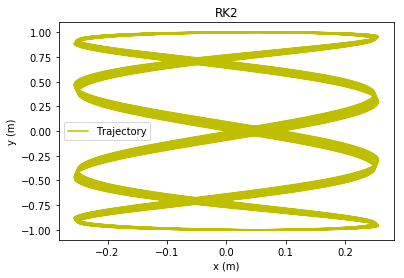

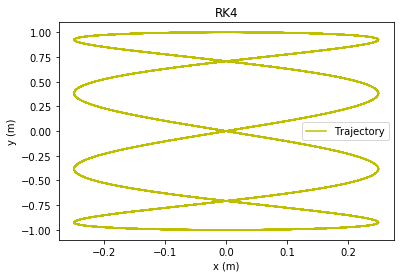

In [7]:

RK2L(0,0,1,1,100)#This runs for 100 seconds rather than 10
RK4L(0,0,1,1,100)#This runs for 100 seconds rather than 10


It can be seen in the plot above that the RK2 method produces thinker lines than RK4 method. This is because each time it goes through a cycle the plot never closes fully, producing more width to the lines. Because of this, the RK4 method will be the one being used throughout the rest of the program. 


# 2. Lissajous Figures 

A Lissajous Figure, is a closed curve plot of two motions working perpendicular with eachother for harmonic motions. In This model those are our x and y directions. When the ratio of each period of these motions creates a rational number, a distinct curve will appear in the plot.  


## 2.1 Exploring Omega Ratios

To determine how Lissajous Figures change when the ratio of the period changes, Different omega values will be used and plotted using RK4.

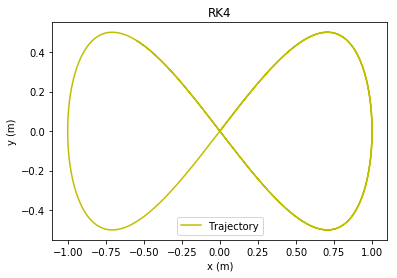

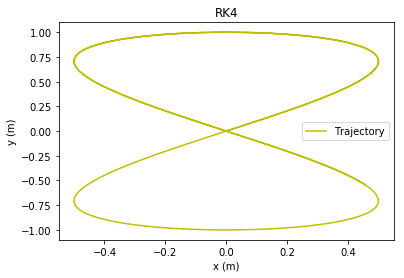

In [8]:
w1=1 
w2=2
RK4L(0,0,1,1,10)
###########################Reset w1 and w2 to 1/2 and plotted
w1=2
w2=1
RK4L(0,0,1,1,10)
###########################Reset w1 and w2 to 2/1 and plotted 


In this example, the Lissajous figures for the values of omega are shown. The values were swithced and the ratio of $\frac{1}{2}$ and 2 were used. It can be observed by this that when the values of omega are switched that the ratio is flipped that the Lissajous Figure rotated 90 degrees around around the center. This makes sense because our forces are perpendicular. 

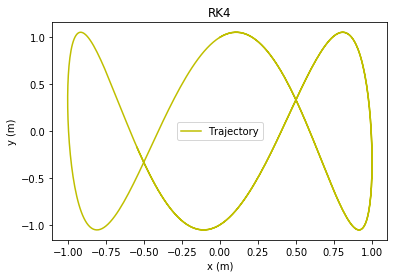

ratio=1/3


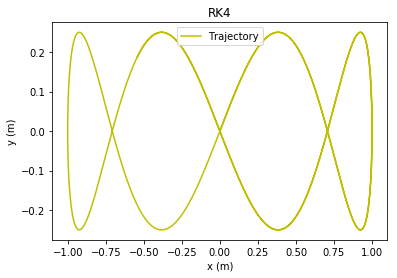

ratio=2/3


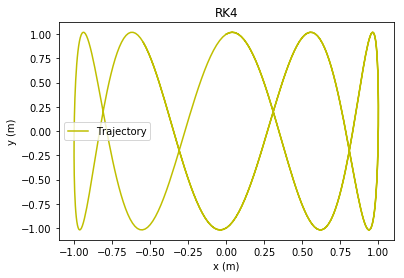

ratio=1/4


In [9]:
w1=1
w2=3
RK4L(0,1,1,1,10) #Used y=1 as starting ry to show LissaJous figure better
print('ratio=1/3')
###########################Reset w1 and w2 to 1/3 and plotted 

w1=1
w2=4
RK4L(0,0,1,1,10)
print('ratio=2/3')
###########################Reset w1 and w2 to 2/3 and plotted
w1=1
w2=5
RK4L(0,1,1,1,10)
print('ratio=1/4')
###########################Reset w1 and w2 to 1/4 and plotted 

It can be seen from the plots above how Lissajous Figures react when the ratio changes(Play Around with Omega Values above if you want to see more examples). When we have a period in one direction equal to one, the Figure will keep the same overall shape that was seen with a ratio of 1/2 but, another loop will be added to the graph(Seen when ratio is equal to 1/4 and 1/3 above). However once one of the $\omega$ is not equal to one the look will change.

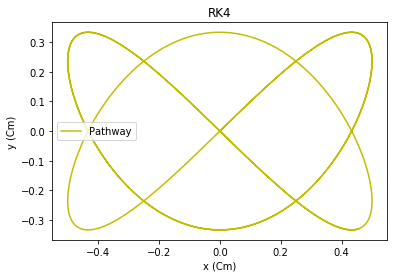

ratio=2/3


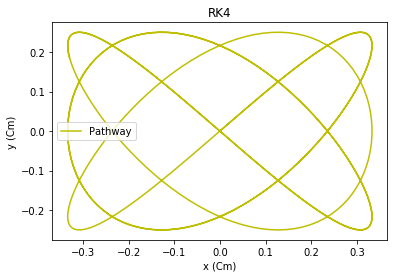

ratio=3/4


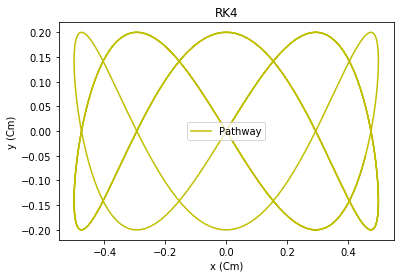

ratio 2/5


In [25]:
w1=2
w2=3
RK4L(0,0,1,1,10) #Used y=1 as starting ry to show LissaJous figure better
print('ratio=2/3')
###########################Reset w1 and w2 to 1/3 and plotted 

w1=3
w2=4
RK4L(0,0,1,1,10)
print('ratio=3/4')
###########################Reset w1 and w2 to 2/3 and plotted
w1=2
w2=5
RK4L(0,0,1,1,10)
print('ratio 2/5')
###########################Reset w1 and w2 to 1/4 and plotted 

After looking at the Lissajous for the given ratios it can be observed that when the interger on the numerator and denominator is increased, more local maximums and minimums appear. Therefore, to Identify the current ratio without looking at the values of $\omega$'s you can draw straight lines parallel to each axis and connect the peaks. The number of peaks that appear in parallel with each axis is equal to the value of $\omega$ . The number of peaks that appear in parallel with the y axis corresponds to the value of $\omega$ in the x direction and vice versa with peaks that appear in parallel with the x axis. 

## 2.2 Exploring Initial Starting Points


To see how Lissajous figures change for different initial starting positions the trajectory of a few different starting points is plotted below.

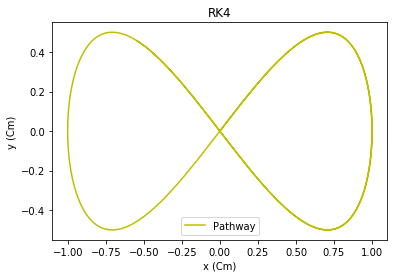

Start At Origin


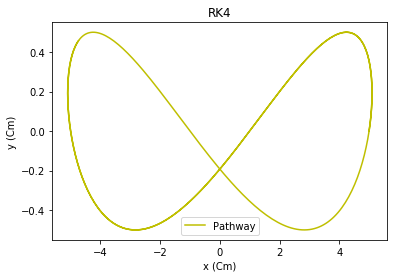

Start At 5,0


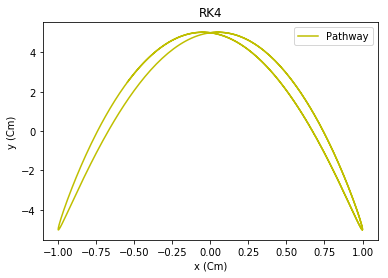

Start At 0,5


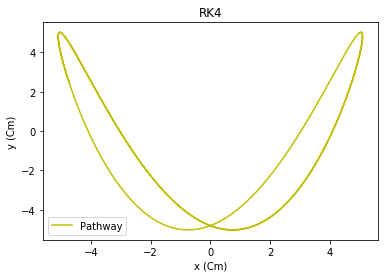

Start At 5,5


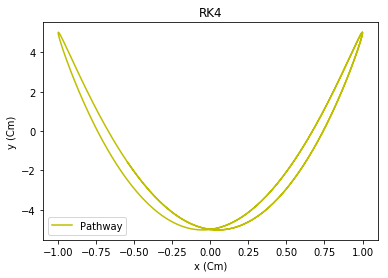

Start At 0,-5


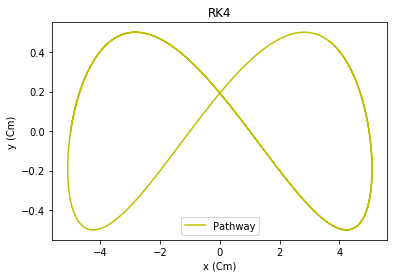

Start At -5,0


In [33]:
w1=1 #Set omega ratio to 1/2
w2=2

#Exploring Starting position 

RK4L(0,0,1,1,10)
print('Start At Origin')
RK4L(5,0,1,1,10)
print('Start At 5,0')
RK4L(0,5,1,1,10)
print('Start At 0,5')
RK4L(5,5,1,1,10)
print('Start At 5,5')
RK4L(0,-5,1,1,10)
print('Start At 0,-5')
RK4L(-5,0,1,1,10)
print('Start At -5,0')

It can be seen from the plots above that the general shape of a Lissajous still contains the same amount of maximums and minimums. Different starting points are able to stretch the Lissajous figure and also increases/decreases the range of values on each axis that corresponds to the starting position in the x and y. 

## 2.3 Exploring Initial Velocities

To help get an idea of how the starting velocities impact the Lissajous figures, there are several plots below that show the trajectory of the harmonic oscillator for a variety of different starting velocity values. Each plot has the same starting initial starting points.

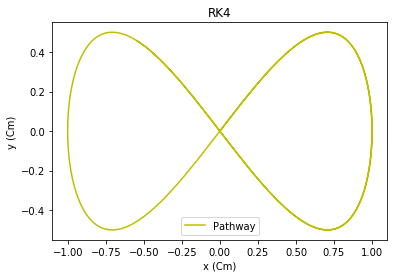

Start At vx=1 vy=1


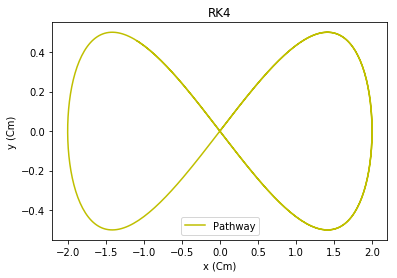

Start At vx=2 vy=1


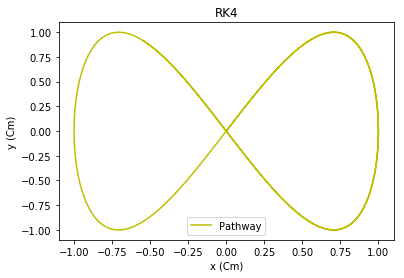

Start At vx=1 vy=2


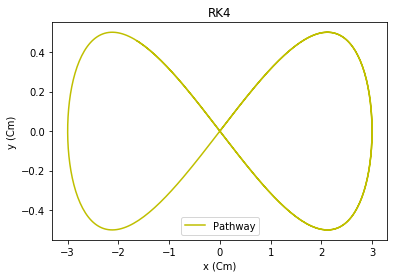

Start At vx=3 vy=1


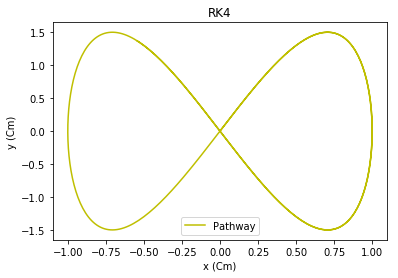

Start At vx=1 vy=3


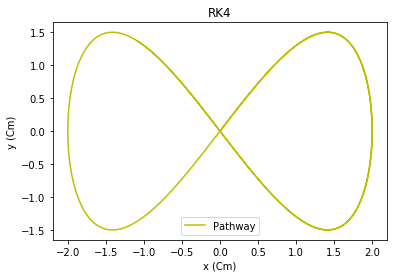

Start At vx=2 vy=3


In [31]:
#Exploring Initial velocities 
RK4L(0,0,1,1,10)
print('Start At vx=1 vy=1')
RK4L(0,0,2,1,10)
print('Start At vx=2 vy=1')
RK4L(0,0,1,2,10)
print('Start At vx=1 vy=2')
RK4L(0,0,3,1,10)
print('Start At vx=3 vy=1')
RK4L(0,0,1,3,10)
print('Start At vx=1 vy=3')
RK4L(0,0,3,3,10)
print('Start At vx=2 vy=3')


It can be seen from the plots above that the Lissajous Figure still holds it's shape with different starting velocities. However the amplutude of the shape changes based of corresponding vx and vy values. A general rule that can be seen from these plots is that the value of vx causes the bounds of the shape in the x direction to be what the starting vx value is. The starting value of vy cause the bounds of the shap in the y direction to be half of the inital vy value.  

# References

American Journal of Physics 20, 121 (1952); https://doi.org/10.1119/1.1933142